In [2]:
import pandas_datareader.data as web
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.diagnostic as dg
import statsmodels.stats.stattools as st

In this worksheet, we're going to examine the Fisher hypothesis for the relationship between interest rate and inflation. The hypothesis states that interest rate $r_t$ fully reflects long-run movements in expected inflation $E(\pi_t)$. For the interest rate, we'll use the 3-month Treasury bill rate. We don't know what consumers *expect* for inflation, but we do know what inflation actually occurred. So, we'll assume that consumers anticipated inflation correctly and use actual inflation as a proxy for expected inflation. For this, we'll use annual % change in CPI. The data is obtained from FRED below.

In [3]:
# Import data from FRED
data = web.DataReader(['TB3MS', 'CPIAUCSL'], 'fred', start='1960-01-01', end='2019-12-31')

1. Create a new column in the dataframe for inflation. You can name it however you want. I'm going to use $\pi_t$ as the symbol. Using CPI, the inflation is defined as: $\pi_t = 100 * \frac{\text{CPI}_{t+12} - \text{CPI}_{t}}{\text{CPI}_{t}}$. Since the data we have are in monthly intervals, we've defined inflation as the *annual change in CPI*.

Note: You can use the **diff** and **shift** functions in Pandas but it's not required. If you've done this correctly, the inflation values from Feb 2019 to Dec 2019 should be *NaN*.

In [4]:
# Your code here
data['Inflation'] = data['CPIAUCSL'].diff(-12).div(data['CPIAUCSL']).mul(100).mul(-1)
data

,TB3MS,CPIAUCSL,Inflation
DATE,,,
1960-01-01,4.35,29.370,1.600272
1960-02-01,3.96,29.410,1.462088
1960-03-01,3.31,29.410,1.462088
1960-04-01,3.23,29.540,0.914015
1960-05-01,3.29,29.570,0.913088
...,...,...,...
2019-08-01,1.95,256.059,NaN
2019-09-01,1.89,256.511,NaN
2019-10-01,1.65,257.244,NaN


2. Estimate the following linear regression model using OLS: 
$$ r_t = \alpha + \beta \pi_t + u_t $$

Save the results and print out the summary.

In [5]:
# Your code here
X = data['Inflation']
X = sm.add_constant(X)
y = data['TB3MS']

model = sm.OLS(y, X, missing='drop')
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  TB3MS   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     420.4
Date:                Sun, 30 Jul 2023   Prob (F-statistic):           1.17e-73
Time:                        13:19:13   Log-Likelihood:                -1654.5
No. Observations:                 708   AIC:                             3313.
Df Residuals:                     706   BIC:                             3322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0157      0.156     12.882      0.0

Note: Below, you'll perform a range of diagnostic tests on the OLS residuals. All the modules you'll need for this have been imported above.

3. Plot the OLS residuals. Does it look like the residuals follow a white noise process?

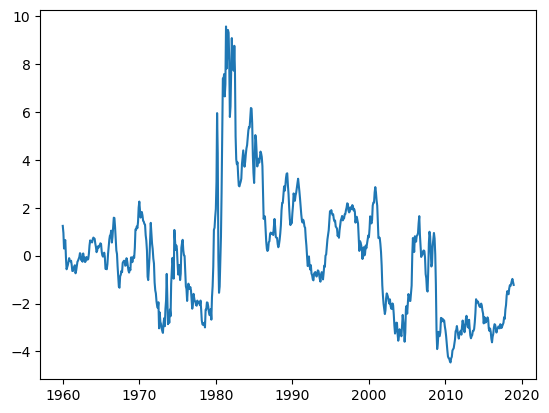

In [6]:
# Your code here. Enter your answer in the box below
plt.plot(results.resid)

As we see the number is highly volatile and we are using the monthly data, so the plot is not clearly follow the white noise process, its hard to find the center fretuate point.

4. Test for autocorrelation in the residuals up to order 12 (i.e. 1 year). Interpret the results.

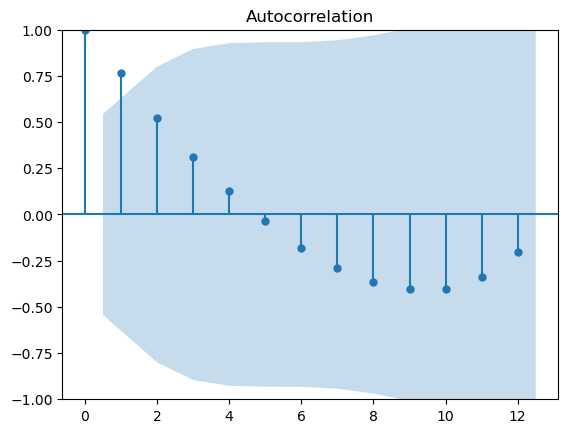

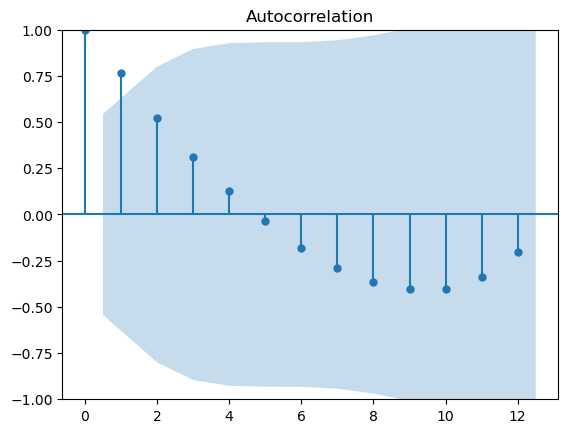

In [7]:
# Your code here. Enter your answer in the box below.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
auto = sm.tsa.acf(results.resid, nlags=12)
plot_acf(auto)

Our result has a very significant autocorrelatio change at start, and the return is increase. After the first significant autocorrelatio, there is not any significant change.

5. Test for ARCH up to order 6. Interpret the results.

In [8]:
# Your code here. Enter your answer in the box below.
dg.het_arch(results.resid, nlags=6)

(627.0773357814263, 3.358993412506851e-132, 969.4857866965921, 0.0)

The sample are spilt into two, and we can see that they are close to eacg other. Also, the lags are really large becasue of our huge sample size and p-values are really close to zero.

6. Test for normality in the residuals. Interpret the results.

In [9]:
# Your code here. Enter your answer in the box below
stats.jarque_bera(results.resid)

SignificanceResult(statistic=166.90879006027313, pvalue=5.704489010798133e-37)

After apply the JB test, we found that the p-value is really close to zero. The statistic is really high means there is large difference between residuals.

7. If the Fisher hypothesis holds, $\beta = 1$. Test this restriction and interpret the result.

In [11]:
# Your code here. Enter your answer in the box below.
hypothesis_beta = 'Inflation = 1'  
test_beta = results.t_test(hypothesis_beta)
print(test_beta)
print('P-value: ' + str(test_beta.pvalue))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.6811      0.033     -9.600      0.000       0.616       0.746
P-value: 1.3590803080652374e-20


The p-value is close to zero, we reject the null hypothesis, also indicates that there is significant evidence to reject the Fisher hypothesis.

8. You've learned how the residuals behave from your tests in steps 4, 5, 6. What effect does this have on your conclusion for step 7? Enter your answer below.

From the perious steps, the data we have for p-value is relatively low and clsoe to zero, so we can reject the null hypothesis and  there is significant evidence to reject the Fisher hypothesis.